In [1]:
options(tidyverse.quiet = TRUE)
library(tidyverse)

source("../R/priors.R")
source("../R/functions.R")

## Comparison of required sample sizes by power-constraint criterion

In [2]:
# one sided maximal type one error rate
alpha            <- 0.025
# minimal power/expected power/probability of success is 1 - beta
beta             <- 0.2
# upper boundary of the null hypothesis for the location parameter 
# H0: theta <= theta_null
theta_null       <- 0.0
# minimal clinically important difference (MCID)
theta_mcid       <- 0.1

In [3]:
PoS_all <- function(prior, n, c, null = 0, mrv = null) {
    part1 <- integrate(
        function(Delta) pdf(prior, Delta) * power(Delta, n, c), prior$lower, null
    )$value
    part2 <- integrate(
        function(Delta) pdf(prior, Delta) * power(Delta, n, c), null, mrv
    )$value
    part3 <- integrate(
        function(Delta) pdf(prior, Delta) * power(Delta, n, c), mrv, prior$upper
    )$value
    return(tibble(a = part1, b = part2, c = part3))
}

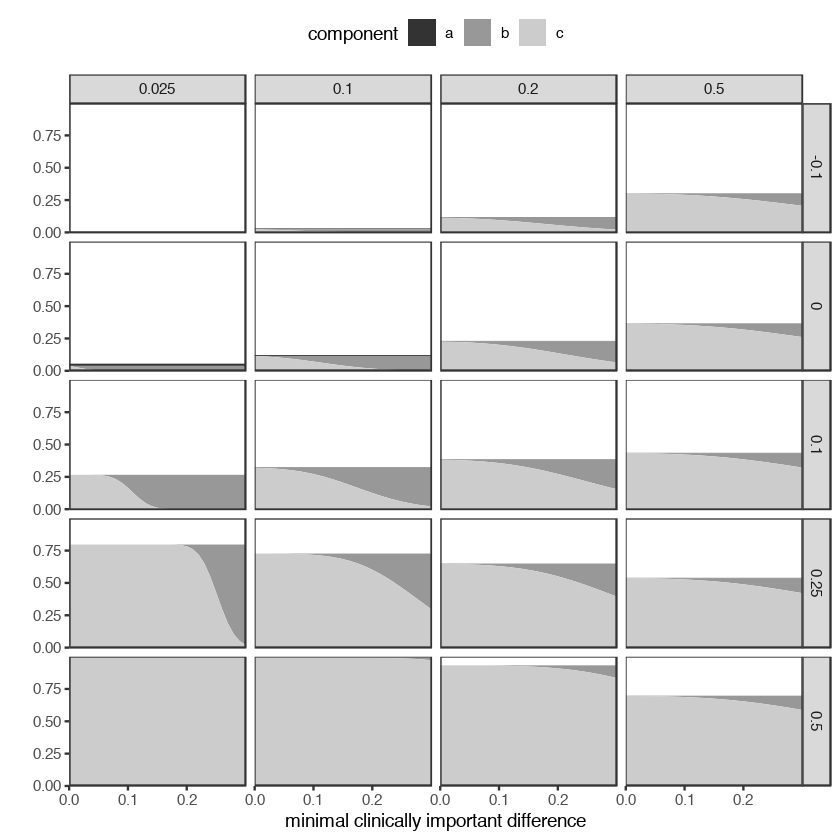

In [14]:
expand_grid(
    prior_mean = c(-.1, .0, .1, .25, .5),
    prior_sd   = c(.025, .1, .2, .5),
    mcid       = seq(0, .3, .01)
) %>%
mutate(
    tmp = pmap(
        list(prior_mean, prior_sd, mcid), 
        ~PoS_all(Normal(..1, ..2, -1, 1), 100, qnorm(1 - .05), mrv = ..3)
    )
) %>% 
unnest(tmp) %>% 
pivot_longer(-c(prior_mean, prior_sd, mcid), names_to = "component") %>%
ggplot(aes(mcid, value)) + 
    geom_area(aes(fill = component)) + 
    facet_grid(prior_mean~prior_sd) + 
    coord_cartesian(expand = FALSE) +
    scale_fill_grey() +
    xlab("minimal clinically important difference") + 
    ylab("") + 
    theme_bw() + 
    theme(
        legend.position = "top",
        panel.grid = element_blank()
    )

# save plot as pdf
ggsave('../latex/figures/pos-components.pdf', width = 8, height = 8)